In [122]:
import numpy as np
import pandas as pd
from IPython.display import display

#import supplementary visualization
import visuals as vs
%matplotlib inline

#loading the dataset
in_file = 'titanic_data.csv'
test_file = 'test.csv'
full_data = pd.read_csv(in_file)
test_data = pd.read_csv(test_file)


#print head
display(full_data.head())

#column survived dicut ke variable baru sebagai target
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1) #column Survived dihapus dari data frame
display(data.head()) #now out data frame has no Survived column
display(outcomes.head()) #print target

#function for accuracy score
def accuracy_score(truth, pred):
    
    #pastikan jumlah baris prediction/truth sama dengan outcomes
    if len(pred) == len(truth):
        return print(',prediction have an accuracy of {:.2f}'.format((truth == pred).mean() * 100))
    else:
        return print('Number of predictions does not match number of outcomes')

#test the function, kita mencoba memberikan prediksi paling sederhana dengan menganggap semua orang akan selamat,
#kita akan lihat hasil perkiraan dumb ini.
predictions = pd.Series(np.ones(len(outcomes), dtype = int))
print('Lets say all passanger are survived ', end = '')
accuracy_score(outcomes, predictions)
#test the function, kita mencoba memberikan prediksi paling sederhana dengan menganggap semua orang akan mati,
#kita akan lihat hasil dari prediksi dumb ini
predictions = pd.Series(np.zeros(len(outcomes), dtype = int))
print('Lets say all passanger were not survived ', end = '')
accuracy_score(outcomes, predictions)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Lets say all passanger are survived ,prediction have an accuracy of 38.38
Lets say all passanger were not survived ,prediction have an accuracy of 61.62


# Question 1
Using the RMS Titanic data, how accurate would a prediction be that none of the passengers survived?
Hint: Run the code cell below to see the accuracy of this prediction.

Answers: 61.62

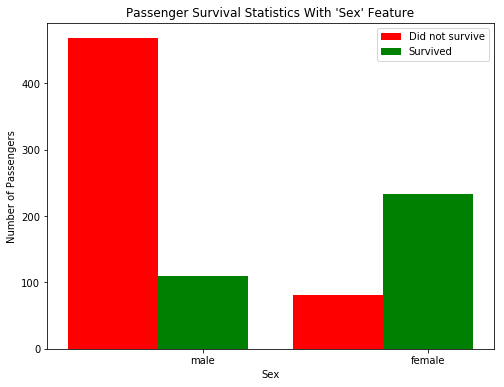

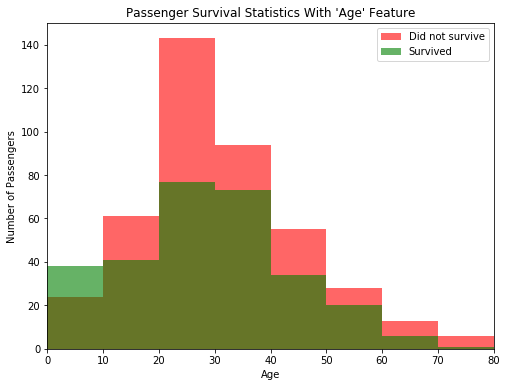

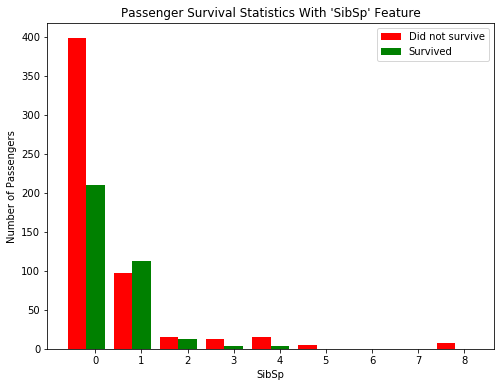

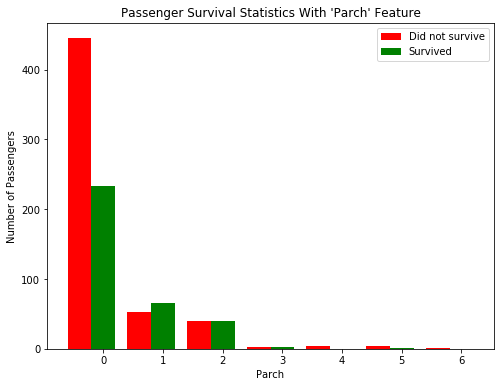

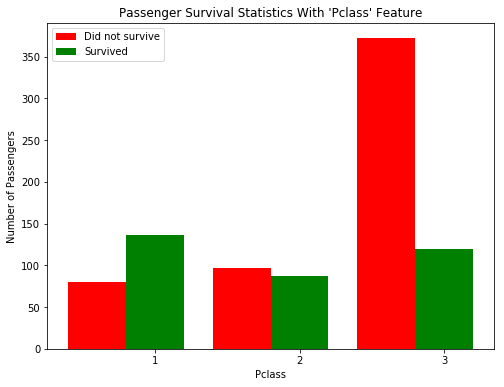

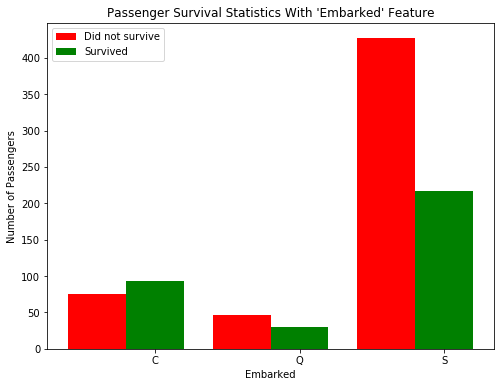

Passengers with missing Embarked values: 2 (2 survived, 0 did not survive


In [123]:
#lets take a look for another feature 'Sex', we could use module visuals.py that has provided
vs.survival_stats(data, outcomes, 'Sex')
#now we take a look with another feature
vs.survival_stats(data, outcomes, 'Age')
#now we take a look for another feature 'SibSp'
vs.survival_stats(data, outcomes, 'SibSp')
#now we take a look for another feature 'Parch'
vs.survival_stats(data, outcomes, 'Parch')
#now we take a look for another feature 'Pclass'
vs.survival_stats(data, outcomes, 'Pclass')
#now we take a look for another feature 'Embarked'
vs.survival_stats(data, outcomes, 'Embarked') #we now know that data needs to be cleaned

In [124]:
#lets make it even more interesting, we create a function that will work on a prediction based on sex feature, 
#(since sex feature has more entropy)
#kita memberi dugaan awal bahwa semua penumpang tidak ada yang selamat(prediksi ini memberikan hasil akurasi 60%)
#kemudian kita melihat vs.survival_stats pada sex feature yang memberikan kita informasi bahwa female memiliki 
#likelihood selamat yang lebih tinggi daripada laki-laki
def predictions_1(data):
    predictions = []
    
    for _, passanger in data.iterrows():
        
        if passanger['Sex'] == 'female':
            predictions.append(1)
        else:
            predictions.append(0)
            
    return pd.Series(predictions)

#lets test this function
predictions = predictions_1(data)

#test the accuracy score using the function we created before
print('We make a prediction if the passanger is a female she more likely survived, and vice versa for male')
print('We got accuracy score for this prediction ', end = '')
accuracy_score(outcomes, predictions)

We make a prediction if the passanger is a female she more likely survived, and vice versa for male
We got accuracy score for this prediction ,prediction have an accuracy of 78.68


# Question 2
How accurate would a prediction be that all female passengers survived and the remaining passengers did not survive?
Hint: Run the code cell below to see the accuracy of this prediction.

Answer: 78.68

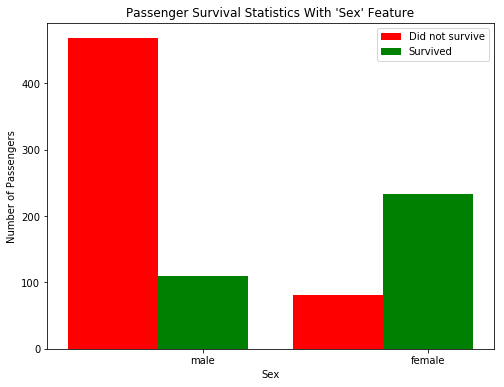

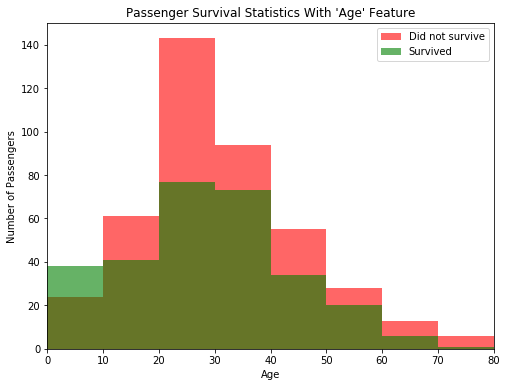

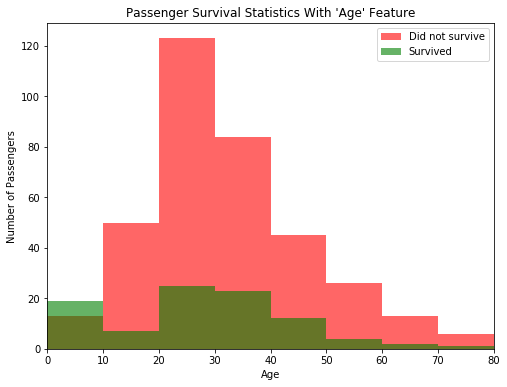

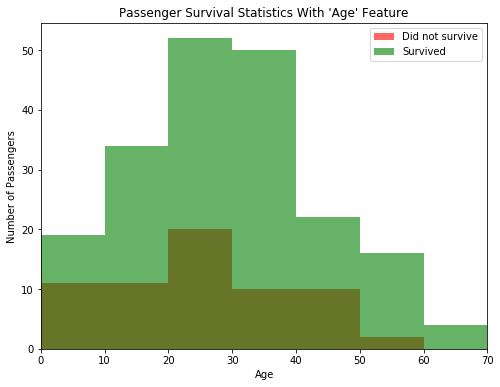

In [125]:
#jika kita menganggap bahwa Sex adalah feature dengan entropy yang tinggi
#maka ide selanjutnya adalah menggabungkan feature 'Sex' denga 'Age'.
#akan sekali lagi divisualisasi kan feature 'Sex' dan 'Age'
vs.survival_stats(data, outcomes, 'Sex')
vs.survival_stats(data, outcomes, 'Age')
#akan kita pecah kombinasi nya menjadi Sex and Age
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'female'"])

In [126]:
#jika kita melihat hasil plot dari vs.visual_stats(data, outcomes, 'Age', ["Sex == 'male'])
#maka kita akan mendapat insight bahwa semua laki-laki yang berumur <= 10 tahun akan selamat
#kita akan buat fungsi predictions_2 yang akan menyempurnakan predictions_1

#lesson learnt, data sudah dirubah dalam csv, jadi gak bisa asal diambil index nya ala Eric Martin
def predictions_2(data):
    predictions = [] #kita ulangi lagi, tapi dengan konsep yang sudah advanced
    
    for _, pessanger in data.iterrows():
        
        if pessanger['Sex'] == 'female': 
            predictions.append(1)
        else:
            if pessanger['Age'] < 10:
                predictions.append(1)
            else:
                predictions.append(0)
            
    return pd.Series(predictions)

#Kita test keampuhan fungsi diatas
predictions = predictions_2(data)
accuracy_score(outcomes, predictions)

,prediction have an accuracy of 79.35


# Question 3
How accurate would a prediction be that all female passengers and all male passengers younger than 10 survived?
Hint: Run the code cell below to see the accuracy of this prediction.

Answer: 79.35

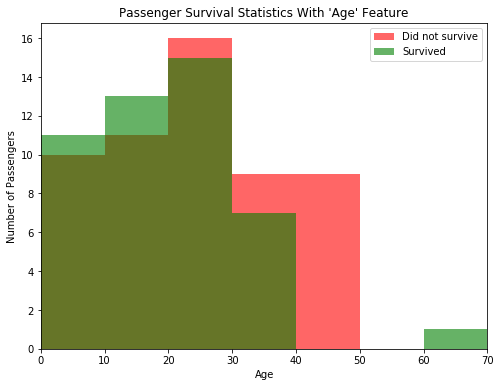

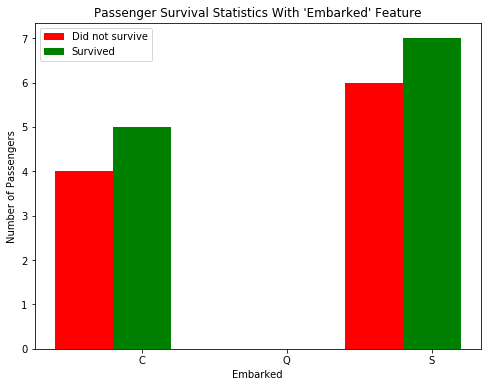

In [127]:
#kita mencari feature dengan entropy yang cukup tinggi untuk membedakan data untuk prediktor
#kita mendapat satu feature baru yaitu:
# female, 40<Age<50, Pclass == 3
vs.survival_stats(data, outcomes,'Age', ["Sex == 'female'", "Pclass == 3"])
vs.survival_stats(data, outcomes, 'Embarked', ["Sex == male", "Parch == 0", "SibSp == 0", "Age > 20", "Age < 40", \
                                            "Pclass == 1"])

In [128]:
#kita akan membuat prediction baru dengan mengkombinasikan semua fungsi prediksi yang tersedia
def predictions_3(data):
    predictions = []
    
    for _, pessanger in data.iterrows():
        
        if pessanger['Sex'] == 'female':
                if pessanger['Age'] >= 40 and pessanger['Age'] <= 50:
                    if pessanger['Pclass'] == 3:
                        predictions.append(0)
                    else:
                        predictions.append(1)
                else:
                    predictions.append(1)
        else:
            if pessanger['Age'] < 10:
                predictions.append(1)
            else:
                predictions.append(0)
                
    return pd.Series(predictions)

#kita akan coba fungsi tersebut untuk melihat perubahan accuracy score
predictions = predictions_3(data)
accuracy_score(outcomes, predictions)



,prediction have an accuracy of 80.36


# Question 4
Describe the steps you took to implement the final prediction model so that it got an accuracy of at least 80%. What features did you look at? Were certain features more informative than others? Which conditions did you use to split the survival outcomes in the data? How accurate are your predictions?
Hint: Run the code cell below to see the accuracy of your predictions.

Answer: I look further to find if there is a branch that could be explored to distinguish the female passanger that could not survived by combining some feature in a if/else condition. 
From our earlier research we found that almost 80% of female passanger survived, this feature could split the outcomes very well, while feature SibSp could not give much information.
For further prediction I added another condition which is "if the passanger is female, if her age is between 40 to 50 and has third class", the passanger could be assured could not survived.

This approach give us higher accuray score( > threshold == 80%) with 80.36% predictions are correct.

# Question 5
Think of a real-world scenario where supervised learning could be applied. What would be the outcome variable that you are trying to predict? Name two features about the data used in this scenario that might be helpful for making the predictions.

Answer: For my real world scenario that apply supervised learning is Handwritting Recognition. The idea behind is to recognize character given by learning the feature of each valid character input, for example to recognize betweel 0 and o. There are some features used in this scenario, but I will mention two whic are aspect ratio and value of the pixel.

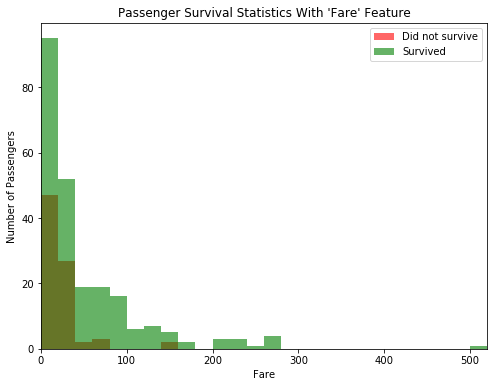

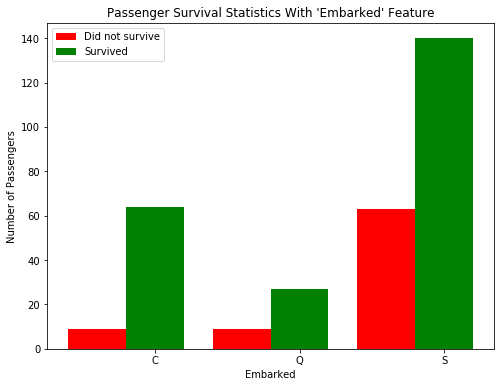

Passengers with missing Embarked values: 2 (2 survived, 0 did not survive


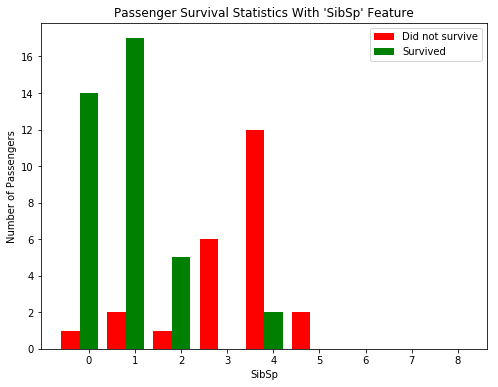

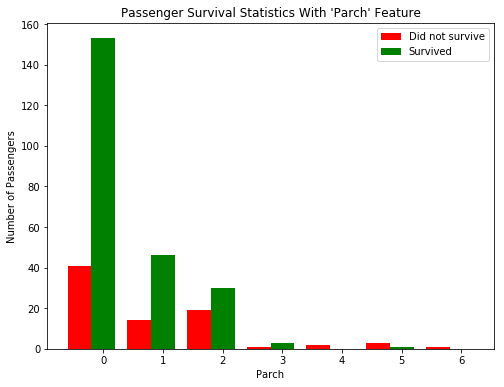

In [129]:
#ini untuk explore lanjut berdasarkan review dari course instructor udacity
vs.survival_stats(data, outcomes, 'Fare', ["Sex == 'female'"])
vs.survival_stats(data, outcomes, 'Embarked', ["Sex == 'female'"])
vs.survival_stats(data, outcomes, 'SibSp', ["Age < 10"])
vs.survival_stats(data, outcomes, 'Parch', ["Sex == 'female'"])

In [130]:
#fungsi untuk memprediksi test file yang diberikan kaggle

def prediction_test(data):
    predictions = []
    
    for _, pessanger in data.iterrows():
        
        if pessanger['Age'] < 10 and pessanger['SibSp'] <= 2:
            predictions.append(1)
        elif pessanger['Sex'] == 'female':
            if pessanger['Age'] >= 40 and pessanger['Age'] <= 50:
                if pessanger['Pclass'] == 3:
                    predictions.append(0)
                else:
                    predictions.append(1)
            else:
                predictions.append(1)
        else:
            predictions.append(0)
            
    return pd.Series(predictions)
                
test_predictions = prediction_test(test_data)
submission = pd.DataFrame({"PassengerId" : test_data['PassangerId'],
                          "Survived" : test_predictions})
print(submission)
submission.to_csv('titanic.csv', index = False)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         1
19           911         0
20           912         0
21           913         1
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         0
391         1283         1
392         1284         0
3